In [730]:
import os
import re
import pandas as pd
import numpy as np
from scipy import signal

## Data Validity and EDA

In [22]:
files = os.listdir('new_data_set')
expected_headers = ["NAME:", "EXPERIMENT TIME:", "ACTIVITY TYPE:", "COUNT OF ACTUAL STEPS:"]
for file in files:
    if "16" not in file:
        filepath = os.path.join('new_data_set', file)
        with open(filepath, 'r') as f:
            file_content = f.read().split("\n")
            for i, line in enumerate(file_content[:4]):
                if expected_headers[i] not in line:
                    print("error at line", i)
                    print(file, line)

error at line 0
10_run_1_1.csv "Name:","run_1_1.csv"
error at line 0
10_run_2_1.csv "Name:","run_2_1.csv"
error at line 0
10_run_3_1.csv "Name:","run_3_1.csv"
error at line 0
10_run_4_1.csv "Name:","run_4_1.csv"
error at line 0
10_run_5_1.csv "Name:","run_5_1.csv"
error at line 0
10_walk_1_1.csv "Name:","walk_1_1.csv"
error at line 0
10_walk_2_1.csv "Name:","walk_2_1.csv"
error at line 0
10_walk_3_1.csv "Name:","walk_3_1.csv"
error at line 0
10_walk_4_1.csv "Name:","walk_4_1.csv"
error at line 0
10_walk_5_1.csv "Name:","walk_5_1.csv"
error at line 3
18_run_1_1.csv COUNT OF ACTUAL STEPS,150,,
error at line 3
18_run_2_1.csv COUNT OF ACTUAL STEPS,130,,
error at line 3
18_run_3_1.csv COUNT OF ACTUAL STEPS,130,,
error at line 3
18_run_4_1.csv COUNT OF ACTUAL STEPS,130,,
error at line 3
18_run_5_1.csv COUNT OF ACTUAL STEPS,130,,
error at line 3
18_walk_1_2.csv COUNT OF ACTUAL STEPS,85,,
error at line 3
18_walk_2_2.csv COUNT OF ACTUAL STEPS,85,,
error at line 3
18_walk_3_2.csv COUNT OF ACTUAL

In [30]:
for file in files:
    filepath = os.path.join('new_data_set', file)
    with open(filepath, 'r') as f:
        file_content = f.read().split("\n")
        row_5 = file_content[5].split(",")
        if row_5 != ['Time [sec]', 'ACC X', 'ACC Y', 'ACC Z'] and row_5 != ['"Time [sec]"', '"ACC X"', '"ACC Y"', '"ACC Z"']:
            print("error in headers for file", file)
            print(row_5)
            print()

error in headers for file 11_walk_1_1.csv
['', '', '', '']

error in headers for file 11_walk_2_1.csv
['', '', '', '']

error in headers for file 11_walk_3_1.csv
['', '', '', '']

error in headers for file 11_walk_5_1.csv
['', '', '', '']

error in headers for file 16_run_1_1.csv
['"Time[sec]"', '"ACC X"', '"ACC Y"', '"ACC Z"']

error in headers for file 16_run_2_1.csv
['"Time[sec]"', '"ACC X"', '"ACC Y"', '"ACC Z"']

error in headers for file 16_run_3_1.csv
['"Time[sec]"', '"ACC X"', '"ACC Y"', '"ACC Z"']

error in headers for file 16_run_4_1.csv
['"Time[sec]"', '"ACC X"', '"ACC Y"', '"ACC Z"']

error in headers for file 16_run_5_1.csv
['"Time[sec]"', '"ACC X"', '"ACC Y"', '"ACC Z"']

error in headers for file 16_walk_1_1.csv
['Time[sec]', 'ACC X', 'ACC Y', 'ACC Z']

error in headers for file 16_walk_2_1.csv
['Time[sec]', 'ACC X', 'ACC Y', 'ACC Z']

error in headers for file 16_walk_3_1.csv
['Time[sec]', 'ACC X', 'ACC Y', 'ACC Z']

error in headers for file 16_walk_4_1.csv
['Time[sec]

In [77]:
files = os.listdir('new_data_set')
time_not_sorted = []
time_not_started_from_zero = []
illegal_float_format = []
missing_values = []
for file in files:
    filepath = os.path.join('new_data_set', file)
    with open(filepath, 'r') as f:
        if file in ["6_run_3_1.csv", "6_run_4_1.csv", "6_walk_5_1.csv", "11_walk_1_1.csv", "11_walk_2_1.csv", "11_walk_3_1.csv", "11_walk_5_1.csv"]:
            df = pd.read_csv("new_data_set/" + file, skiprows=6)
        else:
            df = pd.read_csv("new_data_set/" + file, skiprows=5)
        time_col_name = [s for s in df.columns if "T" in s][0]
        x_col_name = [s for s in df.columns if "X" in s][0]
        y_col_name = [s for s in df.columns if "Y" in s][0]
        z_col_name = [s for s in df.columns if "Z" in s][0]
        
        null_values = df.isnull().sum().sum()
        if null_values > 0:
            missing_values.append(file)
        time_not_float = False
        for col in df.columns:
            if df[col].dtype != float:
                illegal_float_format.append(file)
                if col == time_col_name:
                    time_not_float = True
                    
        if time_not_float == False:
            time_sorted = sorted(list(df[time_col_name]))
            original_time = list(df[time_col_name])
            if time_sorted != original_time:
                time_not_sorted.append(file)
        if df[time_col_name].iloc[0] != 0:
            time_not_started_from_zero.append(file)

In [78]:
time_not_sorted

['12_run_1_2.csv',
 '22_run_3_2.csv',
 '22_run_4_1.csv',
 '22_run_5_1.csv',
 '28_run_1_1.csv',
 '28_run_2_1.csv',
 '28_run_3_1.csv',
 '28_run_4_1.csv',
 '28_run_5_1.csv',
 '28_walk_1_1.csv',
 '28_walk_1_2.csv',
 '28_walk_1_3.csv',
 '28_walk_2_1.csv',
 '28_walk_2_2.csv',
 '29_run_1_2.csv',
 '29_run_2_2.csv',
 '29_run_3_2.csv',
 '29_run_4_1.csv',
 '29_run_5_1.csv',
 '29_walk_1_1.csv',
 '29_walk_2_1.csv',
 '29_walk_3_1.csv',
 '29_walk_4_1.csv',
 '29_walk_5_1.csv',
 '4_run_2_2.csv',
 '4_walk_1_3.csv',
 '4_walk_2_3.csv',
 '4_walk_3_2.csv',
 '7_run_1_1.csv',
 '7_run_2_1.csv',
 '7_run_3_1.csv',
 '7_run_4_1.csv',
 '7_run_5_1.csv',
 '7_walk_1_1.csv',
 '7_walk_2_1.csv',
 '7_walk_3_1.csv',
 '7_walk_4_1.csv',
 '7_walk_5_1.csv',
 '9_walk_2_1.csv']

In [66]:
missing_values

['12_run_1_2.csv', '1_walk_4_1.csv', '4_walk_4_2.csv']

In [67]:
illegal_float_format

['16_run_3_1.csv',
 '1_walk_4_1.csv',
 '1_walk_4_1.csv',
 '1_walk_4_1.csv',
 '1_walk_4_1.csv',
 '31_walk_2_1.csv',
 '4_run_2_2.csv',
 '4_walk_1_3.csv',
 '4_walk_2_3.csv',
 '4_walk_3_2.csv',
 '4_walk_3_2.csv',
 '5_run_3_1.csv',
 '8_run_3_1.csv',
 '8_walk_4_3.csv']

In [92]:
for file in time_not_sorted:
    filepath = os.path.join('new_data_set', file)
    with open(filepath, 'r') as f:
        df = pd.read_csv(filepath, skiprows=5)
        time_col_name = [s for s in df.columns if "T" in s][0]
        time_sorted = sorted(list(df[time_col_name]))
        time_original = list(df[time_col_name])
        print(f"----------------------{file}-----------------")
        k = 0
        for i in range(len(time_original)):
            if time_original[i] != time_sorted[i] and k < 5:
                print(i)
                k += 1 
        print()

----------------------12_run_1_2.csv-----------------
458
459

----------------------22_run_3_2.csv-----------------
546
547
548
549
550

----------------------22_run_4_1.csv-----------------
1
2
3
4
5

----------------------22_run_5_1.csv-----------------
1
2
3
4
5

----------------------28_run_1_1.csv-----------------
1
2
3
4
5

----------------------28_run_2_1.csv-----------------
1
2
3
4
5

----------------------28_run_3_1.csv-----------------
1
2
3
4
5

----------------------28_run_4_1.csv-----------------
1
2
3
4
5

----------------------28_run_5_1.csv-----------------
1
2
3
4
5

----------------------28_walk_1_1.csv-----------------
1
2
3
4
5

----------------------28_walk_1_2.csv-----------------
1
2
3
4
5

----------------------28_walk_1_3.csv-----------------
1
2
3
4
5

----------------------28_walk_2_1.csv-----------------
1
2
3
4
5

----------------------28_walk_2_2.csv-----------------
1
2
3
4
5

----------------------29_run_1_2.csv-----------------
388
389
390
391
392

--

In [51]:
for file in missing_values:
    filepath = os.path.join('new_data_set', file)
    with open(filepath, 'r') as f:
        df = pd.read_csv("new_data_set/" + file, skiprows=5)
        null_mask = df.isnull()
        rows_with_nulls = null_mask.any(axis=1)
        indexes_with_nulls = df.index[rows_with_nulls]
        print(file)
        display(df.isnull().sum())
        print(indexes_with_nulls)
        print()
        print()

12_run_1_2.csv


Time [sec]    2
ACC X         2
ACC Y         2
ACC Z         2
dtype: int64

Index([458, 459], dtype='int64')


1_walk_4_1.csv


Time [sec]    1
ACC X         1
ACC Y         5
ACC Z         5
dtype: int64

Index([996, 997, 998, 999, 1000], dtype='int64')


4_walk_4_2.csv


Time [sec]    0
ACC X         1
ACC Y         0
ACC Z         0
dtype: int64

Index([599], dtype='int64')




In [119]:
unwanted_files = ["1_walk_4_1.csv", "22_run_4_1.csv"]
unwanted_groups = ["28"]
unwanted_files.extend(illegal_float_format)
for file in files:
    filepath = os.path.join('new_data_set', file)
    with open(filepath, 'r') as f:
        file_content = f.read().split("\n")
        if file in unwanted_files:
            continue
        if file in ["6_run_3_1.csv", "6_run_4_1.csv", "6_walk_5_1.csv", "11_walk_1_1.csv", "11_walk_2_1.csv", "11_walk_3_1.csv", "11_walk_5_1.csv"]:
            df = pd.read_csv("new_data_set/" + file, skiprows=6)
        else:
            df = pd.read_csv("new_data_set/" + file, skiprows=5)

        time_col_name = [s for s in df.columns if "T" in s][0]
        x_col_name = [s for s in df.columns if "X" in s][0]
        y_col_name = [s for s in df.columns if "Y" in s][0]
        z_col_name = [s for s in df.columns if "Z" in s][0]
        
        if "20" in file:
            steps_str = file_content[3].split(":")[2]
        elif "18" not in file and "29" not in file:
            steps_str = file_content[3].split(":")[1]
        else:
            steps_str = file_content[3].split(",")[1]
        num_of_steps = int(re.search(r'\d+', steps_str).group())

        if file == "9_walk_2_1.csv":
            df = df.drop(df.tail(2).index)
        
        if file == "4_walk_4_2.csv":
            df = df.fillna({x_col_name: -6.08})
                           
        max_time = df[time_col_name].max()
        if max_time < 20:
            print(f"{file} documented {max_time} seconds with {num_of_steps} steps")

10_run_1_1.csv documented 11.780029 seconds with 25 steps
10_run_2_1.csv documented 16.930176 seconds with 15 steps
10_run_3_1.csv documented 9.48999 seconds with 23 steps
10_run_4_1.csv documented 8.820068 seconds with 18 steps
10_run_5_1.csv documented 16.319824 seconds with 41 steps
10_walk_1_1.csv documented 17.649902 seconds with 10 steps
10_walk_2_1.csv documented 16.470093 seconds with 20 steps
10_walk_3_1.csv documented 18.820068 seconds with 30 steps
10_walk_4_1.csv documented 17.900024 seconds with 20 steps
10_walk_5_1.csv documented 11.27002 seconds with 15 steps
15_run_5_2.csv documented 18.73999 seconds with 60 steps
20_walk_1_2.csv documented 5.85 seconds with 110 steps
26_walk_5_1.csv documented 11.999 seconds with 124 steps
31_run_1_1.csv documented 12.423 seconds with 22 steps
31_run_2_1.csv documented 10.201 seconds with 23 steps
31_run_3_1.csv documented 9.695 seconds with 20 steps
31_run_4_1.csv documented 9.09 seconds with 22 steps
31_run_5_1.csv documented 16.968 

In [121]:
unwanted_files = ["1_walk_4_1.csv", "22_run_4_1.csv", "20_walk_1_2.csv", "26_walk_5_1.csv"]
unwanted_groups = ["28", "10"]

unwanted_files.extend(illegal_float_format)
for file in files:
    filepath = os.path.join('new_data_set', file)
    with open(filepath, 'r') as f:
        file_content = f.read().split("\n")
        group_num = file.split('_')[0]
        
        if file in unwanted_files or group_num in unwanted_groups:
            continue
        if file in ["6_run_3_1.csv", "6_run_4_1.csv", "6_walk_5_1.csv", "11_walk_1_1.csv", "11_walk_2_1.csv", "11_walk_3_1.csv", "11_walk_5_1.csv"]:
            df = pd.read_csv("new_data_set/" + file, skiprows=6)
        else:
            df = pd.read_csv("new_data_set/" + file, skiprows=5)

        time_col_name = [s for s in df.columns if "T" in s][0]
        x_col_name = [s for s in df.columns if "X" in s][0]
        y_col_name = [s for s in df.columns if "Y" in s][0]
        z_col_name = [s for s in df.columns if "Z" in s][0]
        
        if "20" in file:
            steps_str = file_content[3].split(":")[2]
        elif "18" not in file and "29" not in file:
            steps_str = file_content[3].split(":")[1]
        else:
            steps_str = file_content[3].split(",")[1]
        num_of_steps = int(re.search(r'\d+', steps_str).group())

        if file == "9_walk_2_1.csv":
            df = df.drop(df.tail(2).index)
        
        if file == "4_walk_4_2.csv":
            df = df.fillna({x_col_name: -6.08})

        if len(df)/ num_of_steps > 20 or len(df)/ num_of_steps < 4:
            print(f"{file} documented {len(df)/ num_of_steps} records per step with {num_of_steps} steps, total {len(df)} records")

14_run_1_1.csv documented 3.8471337579617835 records per step with 157 steps, total 604 records
14_run_2_2.csv documented 3.613095238095238 records per step with 168 steps, total 607 records
14_run_4_3.csv documented 3.9675324675324677 records per step with 154 steps, total 611 records
15_run_2_2.csv documented 3.8333333333333335 records per step with 60 steps, total 230 records
15_run_5_2.csv documented 3.65 records per step with 60 steps, total 219 records
16_run_2_1.csv documented 3.8333333333333335 records per step with 150 steps, total 575 records
16_run_4_1.csv documented 3.8 records per step with 120 steps, total 456 records
16_run_5_1.csv documented 3.68 records per step with 150 steps, total 552 records
20_run_1_1.csv documented 3.7151515151515153 records per step with 165 steps, total 613 records
20_run_2_1.csv documented 3.624203821656051 records per step with 157 steps, total 569 records
20_run_3_2.csv documented 3.6411764705882352 records per step with 170 steps, total 619

In [248]:
def prepare_df():
    i = 0
    index_to_identifier = {}
    all_df = pd.DataFrame({"time": [], "x": [], "y": [], "z": [], "activity": [], "num_of_steps": [], "identifier": [], 
                          "user_activity_id": [], "num_of_records": []})

    unwanted_files = ["1_walk_4_1.csv", "22_run_4_1.csv", "20_walk_1_2.csv", "26_walk_5_1.csv"]
    unwanted_groups = ["28", "10"]

    unwanted_files.extend(illegal_float_format)
    for file in files:
        params = file.split('_')
        filepath = os.path.join('new_data_set', file)
        with open(filepath, 'r') as f:
            file_content = f.read().split("\n")
            group_num = params[0]
            activity = params[1]
            sample_index = params[2]
            user_sampled = params[3].split(".")[0]

            if file in unwanted_files or group_num in unwanted_groups:
                continue
            if file in ["6_run_3_1.csv", "6_run_4_1.csv", "6_walk_5_1.csv", "11_walk_1_1.csv", "11_walk_2_1.csv", "11_walk_3_1.csv", "11_walk_5_1.csv"]:
                df = pd.read_csv("new_data_set/" + file, skiprows=6)
            else:
                df = pd.read_csv("new_data_set/" + file, skiprows=5)

            time_col_name = [s for s in df.columns if "T" in s][0]
            x_col_name = [s for s in df.columns if "X" in s][0]
            y_col_name = [s for s in df.columns if "Y" in s][0]
            z_col_name = [s for s in df.columns if "Z" in s][0]

            if "20" in file:
                steps_str = file_content[3].split(":")[2]
            elif "18" not in file and "29" not in file:
                steps_str = file_content[3].split(":")[1]
            else:
                steps_str = file_content[3].split(",")[1]
            num_of_steps = int(re.search(r'\d+', steps_str).group())

            if file == "9_walk_2_1.csv":
                df = df.drop(df.tail(2).index)

            if file == "4_walk_4_2.csv":
                df = df.fillna({x_col_name: -6.08})
                
            if file == "12_walk_5_1.csv":
                df[x_col_name] = df[x_col_name].replace(12594553.84, 8.08)
            if file == "7_run_1_1.csv":
                df[x_col_name] = df[x_col_name].replace(1255425.4, 5.02)
            if file == "7_walk_5_1.csv":
                df[x_col_name] = df[x_col_name].replace(555862.25, 0.98)
            if file == "4_walk_4_2.csv":
                df[x_col_name] = df[x_col_name].replace(65, -0.04)
            if file == "30_run_5_1.csv":
                df[y_col_name] = df[y_col_name].replace(4595570.55, -0.24)
            if file == "7_walk_3_1.csv":
                df[y_col_name] = df[y_col_name].replace(1194211.2, 0.04)
                
            index_to_identifier[i] = (group_num, activity, sample_index, user_sampled)
            df['activity'] = np.array([activity] * len(df[time_col_name]))
            df['num_of_steps'] = num_of_steps
            df['identifier'] = i
            df['user_activity_id'] = f"{group_num}_{activity}_{user_sampled}"
            df['num_of_records'] = len(df)
            
            min_time = df[time_col_name].min()
            df[time_col_name] = df[time_col_name] - min_time
            df = df.rename(columns={x_col_name: 'x', y_col_name: 'y', z_col_name: 'z', time_col_name: 'time'})
            all_df = pd.concat([all_df, df[['time', 'x', 'y', 'z', 'activity', 'num_of_steps', 'identifier', 'user_activity_id', "num_of_records"]]], ignore_index=True)
            i += 1
            
    all_df = all_df.drop(all_df[(all_df['time'] == 0) & (all_df['x'] == 0) & (all_df['y'] == 0) & (all_df['z'] == 0)].index)
    all_df = all_df.dropna(subset=['x', 'y', 'z'], axis=0)
    all_df["norm"] = np.linalg.norm(all_df[['x', 'y', 'z']], axis=1)
    all_df["max_norm"] = all_df.groupby('identifier')['norm'].transform('max') 
    all_df["std_norm"] = all_df.groupby('identifier')['norm'].transform('std') 
    all_df["min_norm"] = all_df.groupby('identifier')['norm'].transform('min')
    all_df["mean_norm"] = all_df.groupby('identifier')['norm'].transform('mean')
    
    all_df_agg = all_df.drop_duplicates(subset=["identifier"])
    all_df_agg = all_df_agg[["max_norm", "min_norm", "mean_norm", "std_norm",'activity', 'num_of_steps', 'identifier', 'user_activity_id', "num_of_records"]]
    return all_df, all_df_agg, index_to_identifier

In [801]:
unwanted_files

['1_walk_4_1.csv',
 '22_run_4_1.csv',
 '20_walk_1_2.csv',
 '26_walk_5_1.csv',
 '16_run_3_1.csv',
 '1_walk_4_1.csv',
 '1_walk_4_1.csv',
 '1_walk_4_1.csv',
 '1_walk_4_1.csv',
 '31_walk_2_1.csv',
 '4_run_2_2.csv',
 '4_walk_1_3.csv',
 '4_walk_2_3.csv',
 '4_walk_3_2.csv',
 '4_walk_3_2.csv',
 '5_run_3_1.csv',
 '8_run_3_1.csv',
 '8_walk_4_3.csv']

In [1512]:
all_df, all_df_agg, index_to_identifier = prepare_df()

In [1513]:
print("head of the data:")
display(all_df_agg.head())
print("total number of records:", len(all_df))
print("total number of files:", all_df["identifier"].nunique())
print("types:")
display(all_df_agg.dtypes)

head of the data:


,max_norm,min_norm,mean_norm,std_norm,activity,num_of_steps,identifier,user_activity_id,num_of_records
0,29.306263,1.403962,13.737349,6.276984,run,60.0,0.0,11_run_2,248.0
248,27.981219,1.943202,13.557596,6.463957,run,60.0,1.0,11_run_2,253.0
501,34.203709,1.873866,13.796260,7.780089,run,70.0,2.0,11_run_3,306.0
807,31.244796,1.205221,13.822096,7.526839,run,70.0,3.0,11_run_3,304.0
1111,31.560355,1.117098,13.046984,7.393808,run,60.0,4.0,11_run_1,288.0


total number of records: 147366
total number of files: 221
types:


max_norm            float64
min_norm            float64
mean_norm           float64
std_norm            float64
activity             object
num_of_steps        float64
identifier          float64
user_activity_id     object
num_of_records      float64
dtype: object

In [251]:
all_df_agg.describe()

,max_norm,min_norm,mean_norm,std_norm,num_of_steps,identifier,num_of_records
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,25.130829,2.789301,11.456115,4.815678,113.402715,110.000000,666.837104
std,6.291383,2.194466,1.674688,2.327659,35.038236,63.941379,226.596439
min,13.571518,0.169115,5.882694,0.947798,20.000000,0.000000,91.000000
25%,20.240121,0.925905,10.397257,2.852222,93.000000,55.000000,575.000000
50%,24.014419,2.234032,11.049682,4.164891,110.000000,110.000000,631.000000
75%,30.801666,3.991316,12.166946,7.185365,147.000000,165.000000,760.000000
max,37.692639,9.580146,17.117580,9.511210,186.000000,220.000000,1430.000000


In [252]:
all_df.describe()

,time,x,y,z,num_of_steps,identifier,num_of_records,norm,max_norm,std_norm,min_norm,mean_norm
count,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000,147366.000000
mean,37.271158,0.055309,-1.255825,-1.676843,118.574169,114.901483,743.493940,11.307459,24.960803,4.731969,2.776892,11.307459
std,497.266714,7.243580,7.392411,6.832052,31.190440,61.323747,237.520755,5.506960,6.373867,2.340561,2.212100,1.581004
min,0.000000,-20.080000,-20.080000,-31.930000,20.000000,0.000000,91.000000,0.169115,13.571518,0.947798,0.169115,5.882694
25%,13.837000,-3.730000,-5.650000,-5.490000,100.000000,63.000000,602.000000,7.709332,19.906690,2.830597,0.883855,10.312353
50%,28.187012,0.100000,-0.980000,-1.770000,112.000000,118.000000,664.000000,10.380416,23.746339,3.951522,2.234032,11.011769
75%,44.191797,3.960000,2.590000,1.690000,150.000000,167.000000,888.000000,13.653021,30.842323,7.185365,3.866898,12.030802
max,65900.000000,20.174000,20.500000,20.040000,186.000000,220.000000,1430.000000,37.692639,37.692639,9.511210,9.580146,17.117580


Text(0.5, 1.0, 'num_of_steps vs num_of_records')

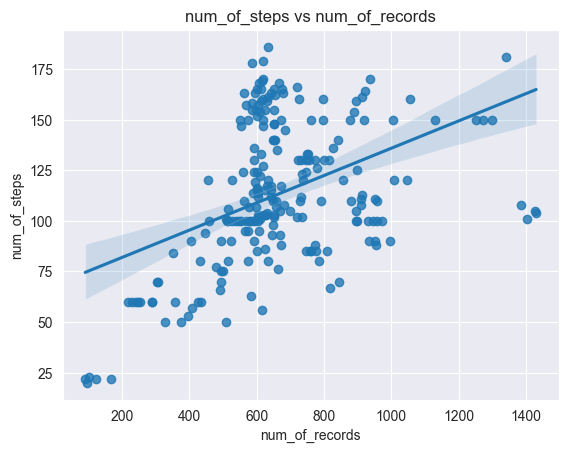

In [256]:
sns.regplot(data=all_df_agg, x="num_of_records", y="num_of_steps")
plt.title("num_of_steps vs num_of_records")

In [255]:
from scipy import stats
res = stats.pearsonr(all_df_agg["num_of_records"], all_df_agg["num_of_steps"])
res

PearsonRResult(statistic=0.4363680461335092, pvalue=1.0914301598037294e-11)

Text(0.5, 1.0, 'Walk mean norm')

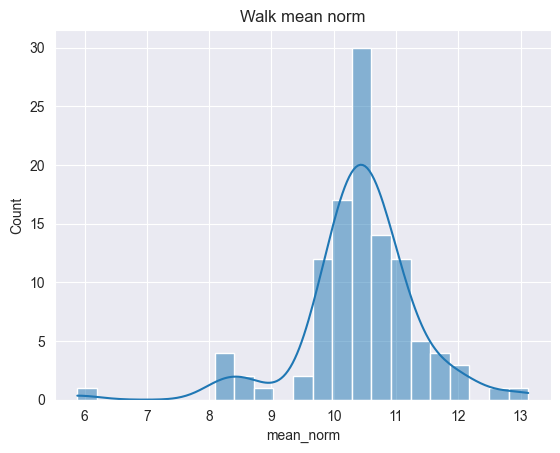

In [239]:
sns.histplot(data=all_df_agg[all_df_agg["activity"] == "walk"], x="mean_norm", kde=True)
plt.title("Walk mean norm")

Text(0.5, 1.0, 'run mean norm')

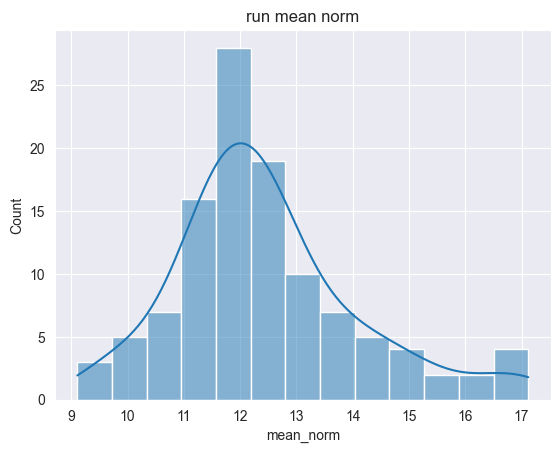

In [240]:
sns.histplot(data=all_df_agg[all_df_agg["activity"] == "run"], x="mean_norm", kde=True)
plt.title("run mean norm")

Text(0.5, 1.0, 'Walk std norm')

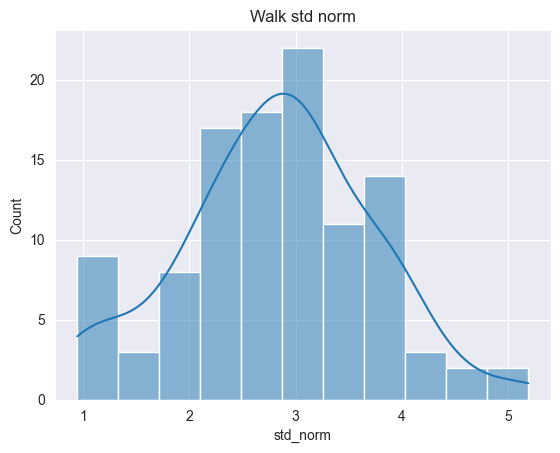

In [241]:
sns.histplot(data=all_df_agg[all_df_agg["activity"] == "walk"], x="std_norm", kde=True)
plt.title("Walk std norm")

Text(0.5, 1.0, 'run std norm')

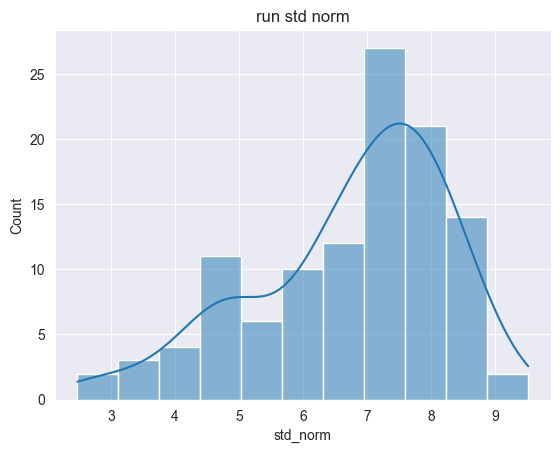

In [245]:
sns.histplot(data=all_df_agg[all_df_agg["activity"] == "run"], x="std_norm", kde=True)
plt.title("run std norm")

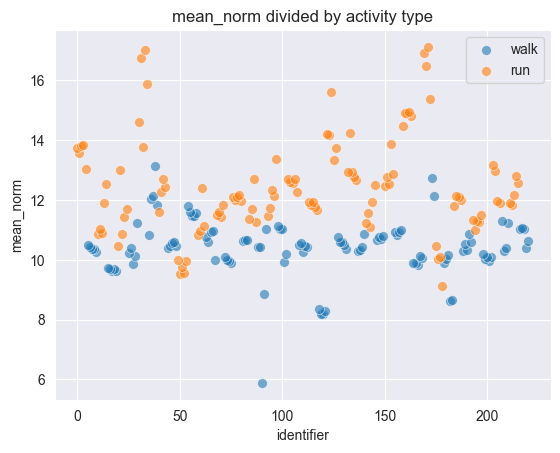

In [277]:
sns.scatterplot(data=all_df_agg[all_df_agg["activity"] == "walk"].sort_values(by="mean_norm"), y="mean_norm", x="identifier", alpha=0.6,s=50, label='walk')
sns.scatterplot(data=all_df_agg[all_df_agg["activity"] == "run"].sort_values(by="mean_norm"), y="mean_norm", x="identifier", alpha=0.6,s=50, label='run')
plt.title("mean_norm divided by activity type")
plt.legend()
plt.show()

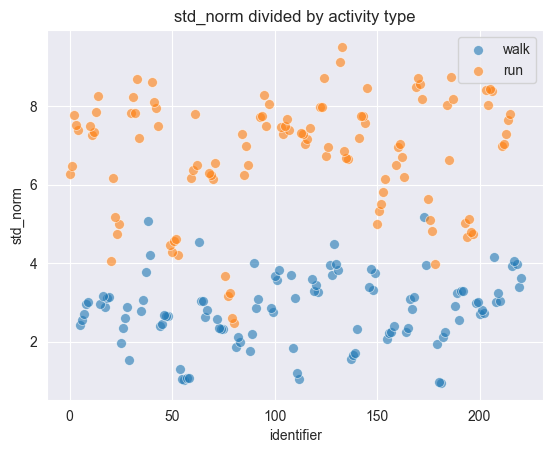

In [276]:
sns.scatterplot(data=all_df_agg[all_df_agg["activity"] == "walk"].sort_values(by="std_norm"), y="std_norm", x="identifier", alpha=0.6,s=50, label='walk')
sns.scatterplot(data=all_df_agg[all_df_agg["activity"] == "run"].sort_values(by="std_norm"), y="std_norm", x="identifier", alpha=0.6, s=50, label='run')
plt.title("std_norm divided by activity type")
plt.legend()
plt.show()

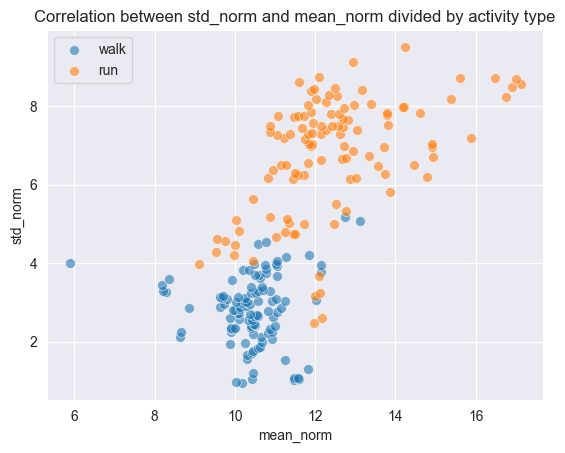

In [275]:
sns.scatterplot(data=all_df_agg[all_df_agg["activity"] == "walk"].sort_values(by="std_norm"), y="std_norm", x="mean_norm", alpha=0.6,s=50, label='walk')
sns.scatterplot(data=all_df_agg[all_df_agg["activity"] == "run"].sort_values(by="std_norm"), y="std_norm", x="mean_norm", alpha=0.6, s=50, label='run')
plt.title("Correlation between std_norm and mean_norm divided by activity type")
plt.legend()
plt.show()

## Modeling- Activity Calssification

In [1054]:
import torch.nn.functional as F
from torch import nn
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR,  SVC
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [279]:
def evaluate_classification_model(y_true,y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_true, y_pred)
    print("F1 Score:", f1)
    auc = roc_auc_score(y_true, y_pred)
    print("AUC-ROC:", auc)
    mae = mean_absolute_error(y_true, y_pred)
    print("Mean Absolute Error:", mae)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", rmse)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

In [1519]:
def evaluate_regression_model(y_true, y_pred):
    series_y_true = pd.Series(y_true).reset_index(drop=True)
    series_y_pred = pd.Series(y_pred).reset_index(drop=True)
    y_true_sorted = series_y_true.sort_values()
    y_pred_sorted = series_y_pred[y_true_sorted.index]
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", rmse)
    r2 = r2_score(y_true, y_pred)
    print("R^2 Score:", r2)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    print("Pearson Correlation:", pearson_corr)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    print("Spearman Correlation:", spearman_corr)
    plt.scatter(range(len(y_true)), y_true_sorted, label="y_true")
    plt.scatter(range(len(y_true)), y_pred_sorted, label="y_pred")
    plt.legend()
    plt.title("Prediction errors")
    plt.show()

#     plt.scatter(y_true, y_pred)
#     plt.xlabel("True Values")
#     plt.ylabel("Predicted Values")
#     plt.title("True vs. Predicted Values")
#     plt.show()

In [1516]:
def run_and_eval(model_class, X_train, y_train, X_test, y_true_per_patient):
    y_train = y_train.replace({"run": 1, "walk": 0})
    y_true_per_patient = y_true_per_patient.replace({"run": 1, "walk": 0})
    model_class.fit(X_train.drop("identifier", axis=1), y_train)
    y_pred = model.predict(X_test.drop("identifier", axis=1))
    evaluate_classification_model(y_true=y_true_per_patient, y_pred=y_pred)
    return y_pred, model

In [282]:
all_users = all_df_agg["user_activity_id"].nunique()
train_users = all_df_agg["user_activity_id"].sample(n=int(0.9*(all_users)), random_state=10)

In [283]:
train_df = all_df_agg[all_df_agg["user_activity_id"].isin(train_users)]
test_df = all_df_agg[~all_df_agg["user_activity_id"].isin(train_users)]

In [284]:
print("train size:", len(train_df), len(train_df)/len(all_df_agg))
print("test size", len(test_df), len(test_df)/len(all_df_agg))

train size: 162 0.7330316742081447
test size 59 0.2669683257918552


Accuracy: 0.9661016949152542
Precision: 0.9428571428571428
Recall: 1.0
F1 Score: 0.9705882352941176
AUC-ROC: 0.9615384615384616
Mean Absolute Error: 0.03389830508474576
Root Mean Squared Error: 0.18411492357966466


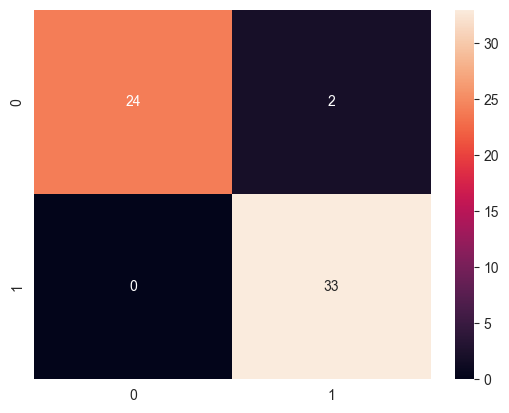

In [292]:
all_users = all_df_agg["user_activity_id"].nunique()
train_users = all_df_agg["user_activity_id"].sample(n=int(0.9*(all_users)), random_state=10)
train_df = all_df_agg[all_df_agg["user_activity_id"].isin(train_users)]
test_df = all_df_agg[~all_df_agg["user_activity_id"].isin(train_users)]
X_train, y_train = train_df[["mean_norm", "std_norm", "identifier"]], train_df["activity"]
X_test, y_test = test_df[["mean_norm", "std_norm", "identifier"]], test_df["activity"]
y_true_per_patient = test_df.groupby("identifier").first()["activity"]
model = XGBClassifier(n_estimators=100, max_depth=10, eta=0.05, gamma=0.1, reg_lambda=0.8, min_child_weight=2)
y_pred, fitted_model = run_and_eval(model, X_train, y_train, X_test, y_true_per_patient)

In [295]:
model = XGBClassifier(n_estimators=100, max_depth=10, eta=0.05, gamma=0.1, reg_lambda=0.8, min_child_weight=2)
all_X, all_y = all_df_agg[["mean_norm", "std_norm"]], all_df_agg["activity"]
all_y_copy = all_y.copy()
all_y_copy = all_y_copy.replace({"run": 1, "walk": 0})

model.fit(all_X, all_y_copy)
import pickle
with open('xgboost_model.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.9661016949152542
Precision: 0.9428571428571428
Recall: 1.0
F1 Score: 0.9705882352941176
AUC-ROC: 0.9615384615384616
Mean Absolute Error: 0.03389830508474576
Root Mean Squared Error: 0.18411492357966466


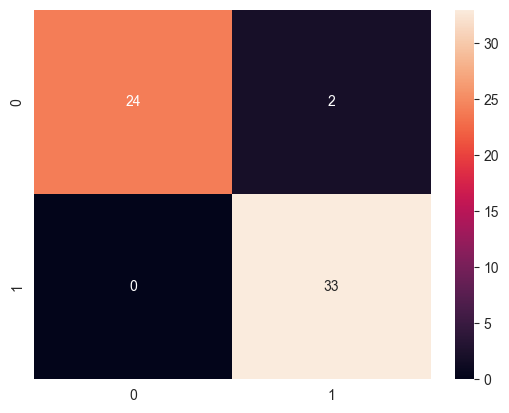

In [1518]:
all_users = all_df_agg["user_activity_id"].nunique()
train_users = all_df_agg["user_activity_id"].sample(n=int(0.9*(all_users)), random_state=10)
train_df = all_df_agg[all_df_agg["user_activity_id"].isin(train_users)]
test_df = all_df_agg[~all_df_agg["user_activity_id"].isin(train_users)]
X_train, y_train = train_df[["mean_norm", "std_norm", "identifier"]], train_df["activity"]
X_test, y_test = test_df[["mean_norm", "std_norm", "identifier"]], test_df["activity"]
y_true_per_patient = test_df.groupby("identifier").first()["activity"]
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_depth=5)
y_pred = run_and_eval(model, X_train, y_train, X_test, y_true_per_patient)

## Modeling - Regression

In [1388]:
def get_threshold(norms, activity):
    if activity == 1:
        return np.mean(norms) + 0.72*np.std(norms)
    else:
        return np.mean(norms) + 0.69*np.std(norms)
    
    
def get_distance(activity):
    if activity == 1:
        return 5
    else:
        return 5
    
    
def smooth_norm(norms, len_window=10):
    smooth_norm = [sum(norms[:len_window]) / len_window]
    for i in range(1, len(norms[1:]) - len_window + 1):
        window = norms[i:i+len_window - 1]
        smooth_norm.append(sum(window) / len_window)
    return smooth_norm


def count_steps_lower_bound(norms_activity, gap_perc=0.95, smooth=False):
    norms = [norm for act, norm in norms_activity]
    activity = [act for act, norm in norms_activity][0]
    if smooth:
        norms = smooth_norm(norms)

    threshold = get_threshold(norms, activity) 
    steps = 0
    above_threshold = False
    for norm in norms:
        if norm > threshold and not above_threshold:
            above_threshold = True
            steps += 1
        elif norm <= gap_perc*threshold and above_threshold:
            above_threshold = False
    return steps


def manual_peak_detection(norms_activity, smooth=False):
    norms = [norm for act, norm in norms_activity]
    activity = [act for act, norm in norms_activity][0]
    if smooth:
        norms = smooth_norm(norms)

    threshold = get_threshold(norms, activity)
    peaks = []
    steps = 0
    for i in range(1, len(norms) - 1):
        if norms[i] > norms[i-1] and norms[i] > norms[i+1]:
            if norms[i] > threshold:
                steps += 1
    return steps


def signal_find_peaks(norms_activity):
    norms = [norm for act, norm in norms_activity]
    activity = [act for act, norm in norms_activity][0]
    cut_off = get_threshold(norms, activity)
    return len(signal.find_peaks(norms, cut_off, distance=get_distance(activity))[0])


def first_peak(norms_activity):
    norms = [norm for act, norm in norms_activity]
    activity = [act for act, norm in norms_activity][0]
    cut_off = get_threshold(norms, activity)
    peaks_indices = signal.find_peaks(norms, cut_off, distance=get_distance(activity))[0]
    return peaks_indices[0]


def peaks_diff(norms_activity):
    norms = [norm for act, norm in norms_activity]
    activity = [act for act, norm in norms_activity][0]
    cut_off = get_threshold(norms, activity)
    norms_std = np.std(norms)
    diffs = []

    peaks_indices = signal.find_peaks(norms, cut_off, distance=get_distance(activity))[0]
    for i in range(len(peaks_indices) - 1):
        diffs.append((peaks_indices[i+1] - peaks_indices[i])/ norms_std)
    return sum(diffs) / len(diffs)


def zero_crossing(norms_activity):
    norms = [norm for act, norm in norms_activity]
    zero_crossing = np.where(np.diff(np.signbit(norms)))[0]
    return len(zero_crossing) / len(norms)

In [ ]:
# df_copy["norm_energy"] = df_copy.groupby('identifier')['norm'].transform(lambda x: np.sum(x**2)/100)
# df_copy["first_peak"] = df_copy.groupby('identifier')['norm'].transform(lambda x: first_peak(list(x)))
# df_copy["zero_crossing"] = df_copy.groupby('identifier')['norm'].transform(lambda x: zero_crossing(x)) 

In [1415]:
from scipy import stats
from scipy.signal import correlate

def reg_pre_process(df):
    df_copy = df.copy()
    df_copy.loc[df.activity == "walk", 'activity'] = 0
    df_copy.loc[df.activity == "run", 'activity'] = 1
    df_copy["activity"] = df_copy["activity"].astype("int")
    
    df_copy["norm_activity"] = list(zip(df_copy["activity"], df_copy["norm"]))
    df_copy["steps_with_lower_bound"] = df_copy.groupby('identifier')['norm_activity'].transform(lambda x: count_steps_lower_bound(x, gap_perc=0.85, smooth=False)) 
    df_copy["manual_peak_detection"] = df_copy.groupby('identifier')['norm_activity'].transform(lambda x: manual_peak_detection(list(x), smooth=False))
    df_copy["signal_find_peaks"] = df_copy.groupby('identifier')['norm_activity'].transform(lambda x: signal_find_peaks(list(x)))
    df_copy["above_mean"] = df_copy.groupby('identifier')['norm'].transform(lambda x: np.sum(x > x.mean()))
    df_copy["peak_diff"] = df_copy.groupby('identifier')['norm'].transform(lambda x: np.mean(np.abs(np.diff(x))))

    df_copy = df_copy.drop_duplicates(subset="identifier")
    return df_copy

In [1416]:
reg_df = reg_pre_process(all_df)

In [1417]:
train_users = reg_df["user_activity_id"].sample(n=int(0.9*(all_users)), random_state=100)
train_df = reg_df[reg_df["user_activity_id"].isin(train_users)]
test_df = reg_df[~reg_df["user_activity_id"].isin(train_users)]
X_train, y_train = train_df[["peak_diff", "activity", "above_mean", "steps_with_lower_bound", "manual_peak_detection", "signal_find_peaks"]], train_df["num_of_steps"]
X_test, y_test = test_df[["peak_diff", "activity", "above_mean", "steps_with_lower_bound", "manual_peak_detection", "signal_find_peaks"]], test_df["num_of_steps"]

Root Mean Squared Error: 16.20645312235276
R^2 Score: 0.8231784110928353
Pearson Correlation: 0.9080431726051228
Spearman Correlation: 0.8813870104067362


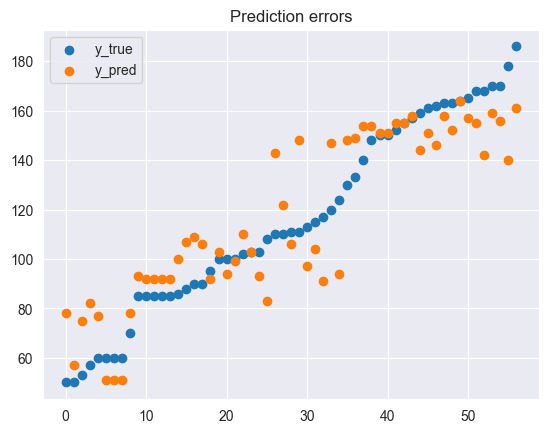

In [1418]:
model_reg = XGBRegressor(n_estimators=100, max_depth=10, eta=0.05, gamma=0.1, reg_lambda=0.8, min_child_weight=2)
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)
y_pred = y_pred.astype(int)
evaluate_regression_model(y_test, y_pred)

In [1423]:
y_test - y_pred

0        -10.0
248      -13.0
1111     -10.0
5144       2.0
6064       9.0
10449     28.0
11053     34.0
18314    -13.0
18749    -14.0
19244    -16.0
19573      3.0
20126     -5.0
29743     -4.0
30553     16.0
31330      9.0
32076     10.0
32835      7.0
34901     10.0
38854      5.0
46768     38.0
47387     55.0
47973     42.0
50489     36.0
52277     33.0
53562    -11.0
56008     -3.0
57016    -11.0
57968     -9.0
58849    -18.0
59746     -8.0
60143    -31.0
60651    -36.0
61585    -47.0
62581    -43.0
82757      4.0
83679      2.0
87314    -10.0
88225     -3.0
89138    -15.0
90048    -18.0
105118     9.0
105750     3.0
106350     9.0
106949     3.0
107626     6.0
108261   -10.0
108886    -4.0
113535    12.0
135792    26.0
136436    30.0
137088     5.0
137820     1.0
138570   -11.0
139143   -27.0
139878   -20.0
146212     9.0
146812    24.0
Name: num_of_steps, dtype: float64

In [1419]:
walk_indices = X_test[X_test["activity"] == 0].index
run_indices = X_test[X_test["activity"] == 1].index
y_pred_ser = pd.Series(y_pred, index=y_test.index)
y_test_walk = y_test[walk_indices]
y_pred_walk = y_pred_ser[walk_indices]
y_test_run = y_test[run_indices]
y_pred_run = y_pred_ser[run_indices]

In [1420]:
np.sqrt(mean_squared_error(y_test_run, y_pred_run))

17.519447322411704

In [1421]:
np.sqrt(mean_squared_error(y_test_walk, y_pred_walk))

14.723644735109383

In [720]:
def plot_norm(all_df, file_name, index_to_identifier):
    plt.figure(figsize=(12, 6))
    params = file_name.split("_")
    params[3] = params[3].split(".")[0]
    for key, val in index_to_identifier.items():
        if val == tuple(params):
            identifier = key
    df_filtered = all_df[all_df["identifier"] == identifier]
    step_window = df_filtered["time"].max() / df_filtered["num_of_steps"].max()
    norm_mean = df_filtered["norm"].mean()
    std_mean = df_filtered["norm"].std()
    sns.lineplot(data=df_filtered, y="norm", x="time", label="actual", zorder=1)
    sns.lineplot(y=np.full(len(df_filtered), norm_mean), x=df_filtered["time"], label="mean", zorder=2)
    sns.lineplot(y=np.full(len(df_filtered), std_mean), x=df_filtered["time"], label="std", zorder=3)
    # x = list(np.arange(0, df_filtered["time"].max() , step_window))
    # sns.scatterplot(x=x, y=np.full(len(x), norm_mean), label="expected", color="orange", zorder=2)
    plt.title(f"norm values of {file_name}")
    plt.legend()
    plt.show()

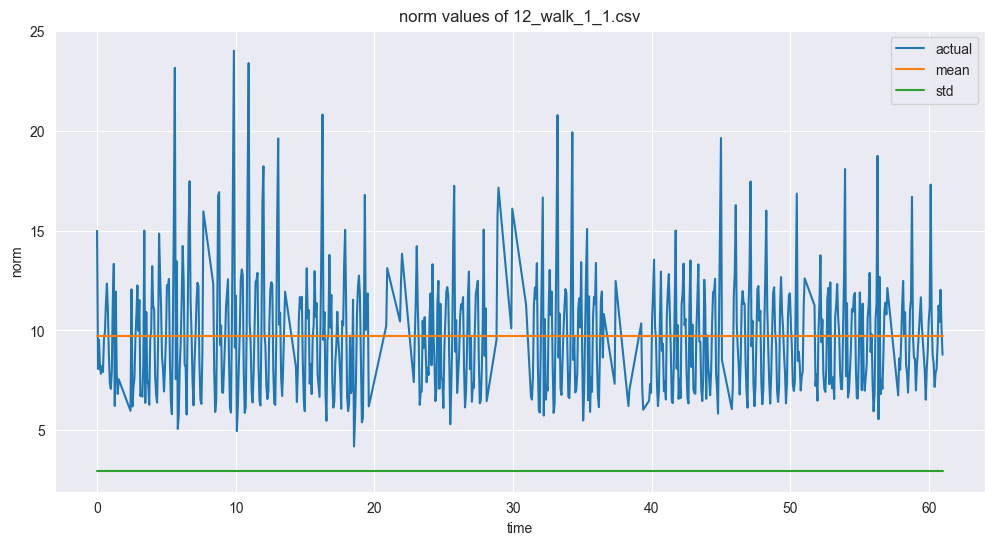

In [721]:
plot_norm(all_df, "12_walk_1_1.csv", index_to_identifier)

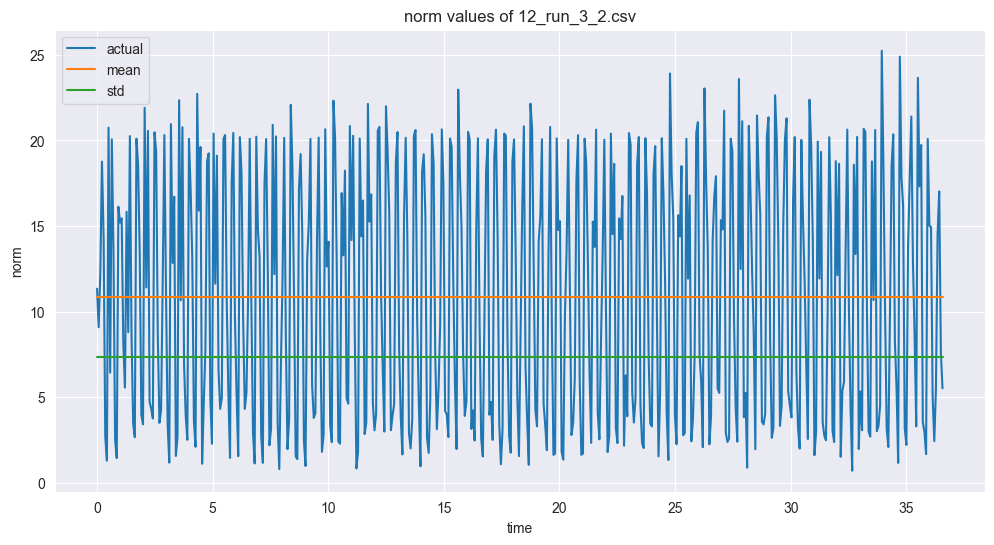

In [722]:
plot_norm(all_df, "12_run_3_2.csv", index_to_identifier)

In [662]:
train_users = reg_df["user_activity_id"].sample(n=int(0.9*(all_users)), random_state=100)
train_df = reg_df[reg_df["user_activity_id"].isin(train_users)]
test_df = reg_df[~reg_df["user_activity_id"].isin(train_users)]
X_train, y_train = train_df[["mean_norm", "std_norm", "estimated_steps"]], train_df["num_of_steps"]
X_test, y_test = test_df[["mean_norm", "std_norm","estimated_steps"]], test_df["num_of_steps"]

In [1424]:
test_df.head(21)

,time,x,y,z,activity,num_of_steps,identifier,user_activity_id,num_of_records,norm,max_norm,std_norm,min_norm,mean_norm,norm_activity,steps_with_lower_bound,manual_peak_detection,signal_find_peaks,above_mean,peak_diff
0,0.0,-10.551956,0.784532,-1.647517,1,60.0,0.0,11_run_2,248.0,10.708575,29.306263,6.276984,1.403962,13.737349,"(1, 10.708574982239654)",53,54,30,105,6.984827
248,0.0,-10.316596,1.294478,-1.216025,1,60.0,1.0,11_run_2,253.0,10.468359,27.981219,6.463957,1.943202,13.557596,"(1, 10.468359141733963)",55,55,29,109,7.209198
1111,0.0,-10.630410,-0.078453,0.000000,1,60.0,4.0,11_run_1,288.0,10.630699,31.560355,7.393808,1.117098,13.046984,"(1, 10.630699489747087)",53,53,39,117,7.473474
5144,0.0,-0.510000,-7.260000,-7.770000,1,150.0,13.0,12_run_3,920.0,10.646154,30.694825,7.861174,0.509313,11.895387,"(1, 10.646154235215644)",144,146,129,409,7.097808
6064,0.0,0.000000,-11.920000,-6.390000,1,150.0,14.0,12_run_3,876.0,13.524737,34.658337,8.265133,0.438406,12.545740,"(1, 13.524736596326008)",142,149,127,396,7.574292
10449,0.0,0.160000,-8.430000,-4.750000,1,157.0,20.0,14_run_1,604.0,9.677448,28.416691,4.055269,1.846212,10.461323,"(1, 9.677448010710261)",118,119,66,284,4.701982
11053,0.0,-1.140000,-1.290000,-9.730000,1,168.0,21.0,14_run_2,607.0,9.881123,30.094907,6.161414,2.273983,13.018826,"(1, 9.88112341791155)",127,127,63,258,7.405254
18314,0.0,10.790000,-0.200000,0.670000,0,60.0,35.0,15_walk_1,435.0,10.812632,20.198146,2.774965,3.640398,10.828903,"(0, 10.812631502090506)",59,62,48,171,2.756355
18749,0.0,1.530000,-4.240000,11.020000,0,70.0,36.0,15_walk_2,495.0,11.906255,26.842733,3.060434,4.246940,12.030802,"(0, 11.90625465879174)",66,70,57,227,2.932949
19244,0.0,-0.120000,-3.570000,11.020000,0,50.0,37.0,15_walk_2,329.0,11.584459,23.670670,3.785563,3.767625,12.145011,"(0, 11.584459417685402)",50,54,41,148,3.606172


In [1425]:
index_to_identifier[79]

('20', 'run', '4', '2')

In [663]:
(len(test_df)/len(reg_df))*100

25.791855203619914

Root Mean Squared Error: 20.516146828821302
R^2 Score: 0.7166319176367179
Pearson Correlation: 0.8566758974494986
Spearman Correlation: 0.8372101202117556


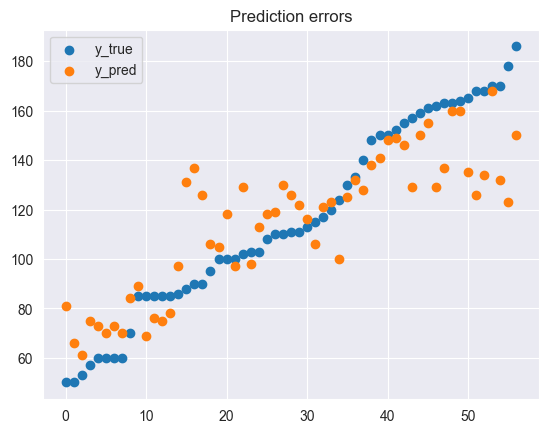

In [1422]:
model_reg = Lasso(alpha=4) 
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)
y_pred = y_pred.astype(int)
evaluate_regression_model(y_test, y_pred)